# Case study :The client with loan payment difficulties and All other cases

__Problem Statement__:
This case study aims to identify patterns which indicate if a client has difficulty in paying their instalments which
may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) 
at a higher interest rate, etc.

    - The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y 
                                           instalments of the loan in our sample

    - All other cases: All other cases when the payment is paid on time.

___Data of applicantion___

In [230]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_rows",1000)

In [231]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("application_data.csv")
inp0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
# shape of the dataframe
inp0.shape

(307511, 122)

___Data Handling and Cleaning___

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

In [233]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#Check the number of null values in the columns
for i in inp0.columns:
    print(i,inp0[i].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [5]:
###finding the percentage of missing values greater than 35% and drop those columns
 

In [6]:
for i in inp0.columns:
    if inp0[i].isnull().mean()> 0.35:
     
        inp0.drop(i,axis=1,inplace=True)
        

In [7]:
###remaining coloumns and null values
inp0.shape
inp0.isnull().mean()


SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 73, dtype: float64

In [8]:
### max percentage of missing valuesin  remaining columns
inp0.isnull().mean().max()

0.31345545362604915

In [9]:
for i in inp0.columns:
    if inp0[i].isnull().mean()> 0.30:
        print(i)

OCCUPATION_TYPE


In [10]:
#### here occupation type of the client is important for the analysis so we need to impute the null values in occupation type
inp0['OCCUPATION_TYPE'].dtype

dtype('O')

In [11]:
####from the above it is a categorical variable so we need to use mode method and fill the null values with that mode

In [12]:
inp0['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [13]:
inp0['OCCUPATION_TYPE'].fillna(inp0['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [14]:
inp0['OCCUPATION_TYPE'].isnull().sum()

0

___Checking for data imbalance in the given dataset___

Data imbalance usually reflects an unequal distribution of classes within a dataset.Here we need to check data imabalance
in target variable 

In [15]:
inp0['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

__Error values checking__

In the dataset days columns are given as negative which is an error,so we need to change them with absolute values for this we copy input data to new dataframe



In [16]:
negcol=[i for i in inp0 if i.startswith('DAYS')]
negcol

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [17]:
inp1=inp0.copy()


In [18]:
inp1[negcol]=abs(inp1[negcol])
inp1[negcol].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [19]:
### there are some XNA values replace XNA values with NaN values

In [20]:
inp1.replace('XNA',np.nan,inplace=True)
inp1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Handling outliers using univariate analysis
The purpose of univariate analysis is to understand the distribution of values for a single variable.Here boxplot can be used 
for handling outliers.

outliers present in numerical features only,so we take all the columns which are __float64 type and some int64__
which may contains outliers

In [21]:
inp_nume=[i for i in inp1 if inp1[i].dtype=='float64']
print(len(inp_nume))

20


In [22]:
### here only some int numerical contains outliers because others are flags and ratings which may not have outliers
int_col=['CNT_CHILDREN','DAYS_BIRTH', 'DAYS_EMPLOYED' ,'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START' ]
for i in int_col: 
    inp_nume.append(i)

In [23]:
print(len(inp_nume))
inp_nume

25


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START']

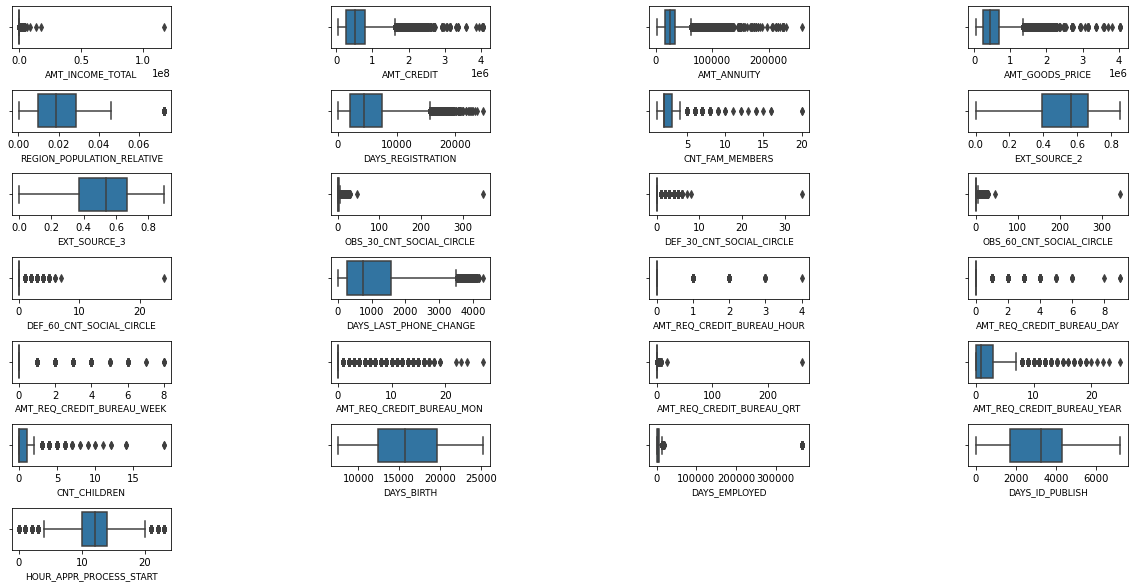

In [24]:
#Box plot for numerical variables
i=1
plt.figure(figsize=(20,10))
for col in inp_nume: 
    plt.subplot(7,4,i)
    sns.boxplot(inp1[col])
    plt.xlabel(col,size=9)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()
    

it can seen that outliers are allmost present in all variables except some.For __EXT_SOURCE2,EXT_SOURCE_3,DAYS_BIRTH,
DAYS_ID_PUBLISH__ no outliers are present

___Univariate plots for some categorical features___

In [207]:
###set of some categorical features
inp_cat=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','CODE_GENDER','OCCUPATION_TYPE']

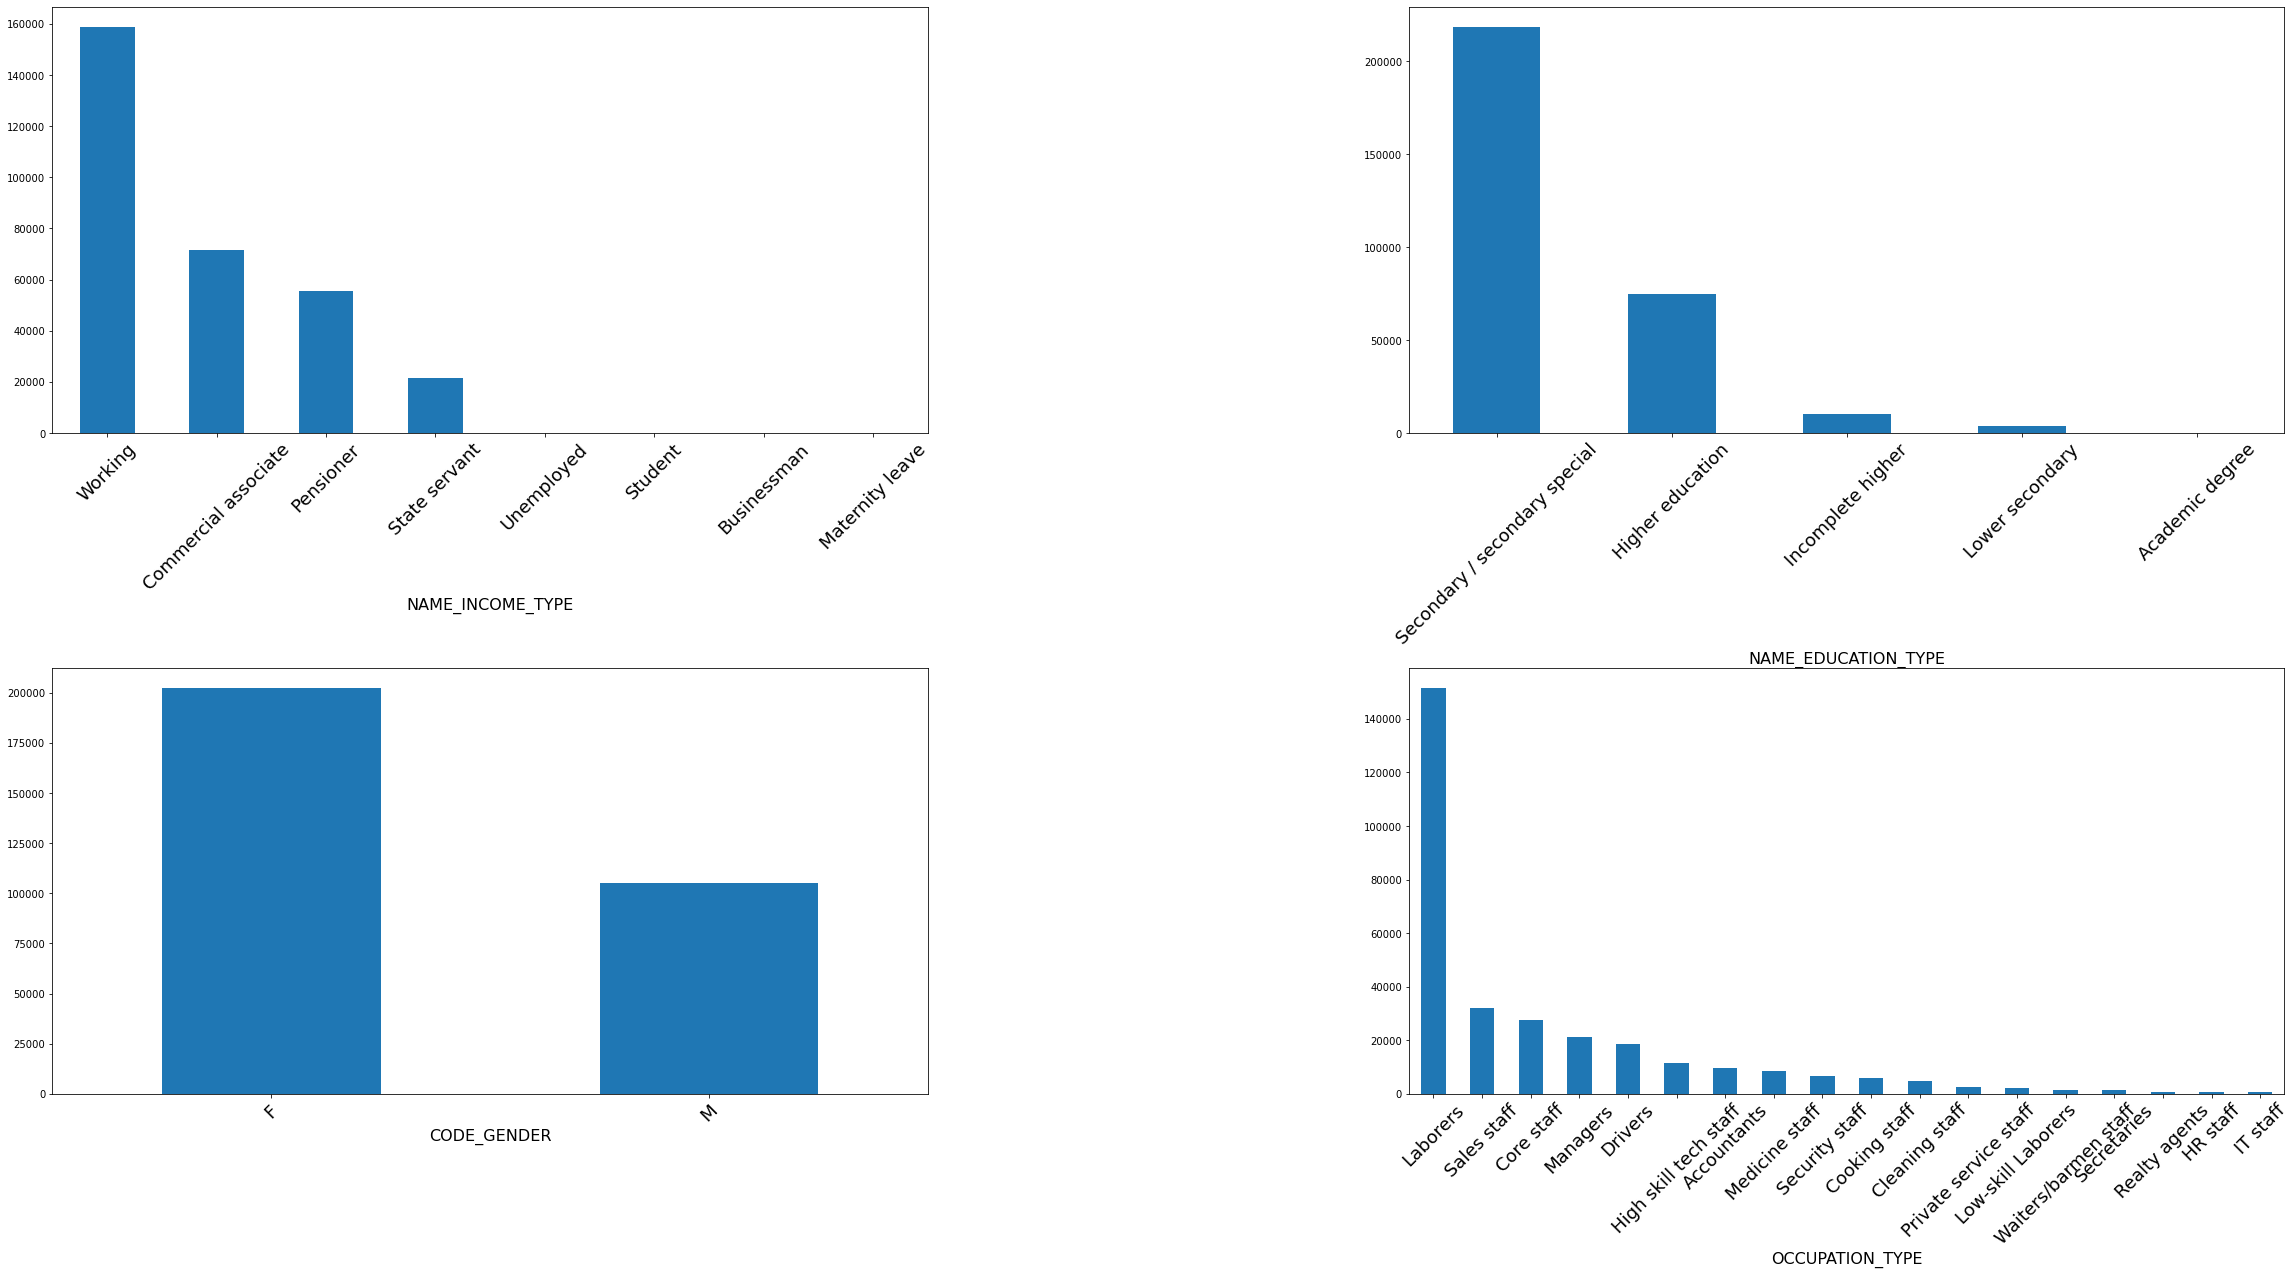

In [208]:
###plotting using barplots
i=1
plt.figure(figsize=(40,20))
for col in inp_cat: 
    plt.subplot(2,2,i)
    inp1[col].value_counts().plot(kind='bar')
    plt.xlabel(col,size=16)
    plt.xticks(rotation=45,size=18)
    i=i+1
plt.subplots_adjust(hspace=0.55,wspace=0.55) 
plt.show()

from the bar chart we can tell that in the applications dataset,__working people__ are high in income type, 
__secondary/secondary special__ educated people are in education type,__individual house/apartments__ are high in house type
and __laborers__ are high in occpation type 

___Bivariate analysis___

Bivariate analysis gives the relation ship between two variables.Here we will do analysis between the other variables with 
target variable.After dropping null value variables , 73 variables remains present in the dataset,but for our analysis we will
take some set of important variables including target variable. Then do correlation between the numerical variables and plot
bargraphs for categorical for bivariate analysis

In [164]:
###set of important variables
inp_imp=['TARGET','FLAG_OWN_CAR','CODE_GENDER','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE',
   'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION','OCCUPATION_TYPE','HOUR_APPR_PROCESS_START',
   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','DEF_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START']

In [165]:
####find correlation and generate heatmap for numerical variables

inp_corr=inp1[inp_imp].corr(method='pearson')
inp_corr

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,DEF_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.078239,-0.047046,-0.051457,-0.041975,-0.024166,-0.012462,-0.002022,0.032248,0.009308
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.330938,-0.241583,0.028019,-0.183395,-0.007292,-0.010808,-0.007836,-0.001262,0.879161
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,-0.027261,-0.063835,-0.008506,-0.027805,0.036459,0.024700,0.004859,-0.013244,0.016342
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.055436,-0.064319,0.006575,-0.009621,0.052738,0.054451,0.015925,-0.021229,0.063160
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,-0.009445,-0.102851,-0.011268,-0.038514,0.052269,0.039148,0.010124,-0.022833,0.075539
AMT_GOODS_PRICE,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.053442,-0.062265,0.009267,-0.011565,0.062320,0.056422,0.016432,-0.022244,0.061185
DAYS_BIRTH,-0.078239,-0.330938,-0.027261,0.055436,-0.009445,0.053442,1.000000,0.623941,0.272691,0.331912,-0.091064,-0.001372,0.011799,-0.000206,-0.278894
DAYS_EMPLOYED,-0.047046,-0.241583,-0.063835,-0.064319,-0.102851,-0.062265,0.623941,1.000000,0.274842,0.214573,-0.091641,-0.033753,0.015155,0.016460,-0.234365
DAYS_ID_PUBLISH,-0.051457,0.028019,-0.008506,0.006575,-0.011268,0.009267,0.272691,0.274842,1.000000,0.101896,-0.031676,0.009660,0.006200,-0.002738,0.020912
DAYS_REGISTRATION,-0.041975,-0.183395,-0.027805,-0.009621,-0.038514,-0.011565,0.331912,0.214573,0.101896,1.000000,0.010908,0.011353,0.001308,-0.003361,-0.173416


<AxesSubplot:>

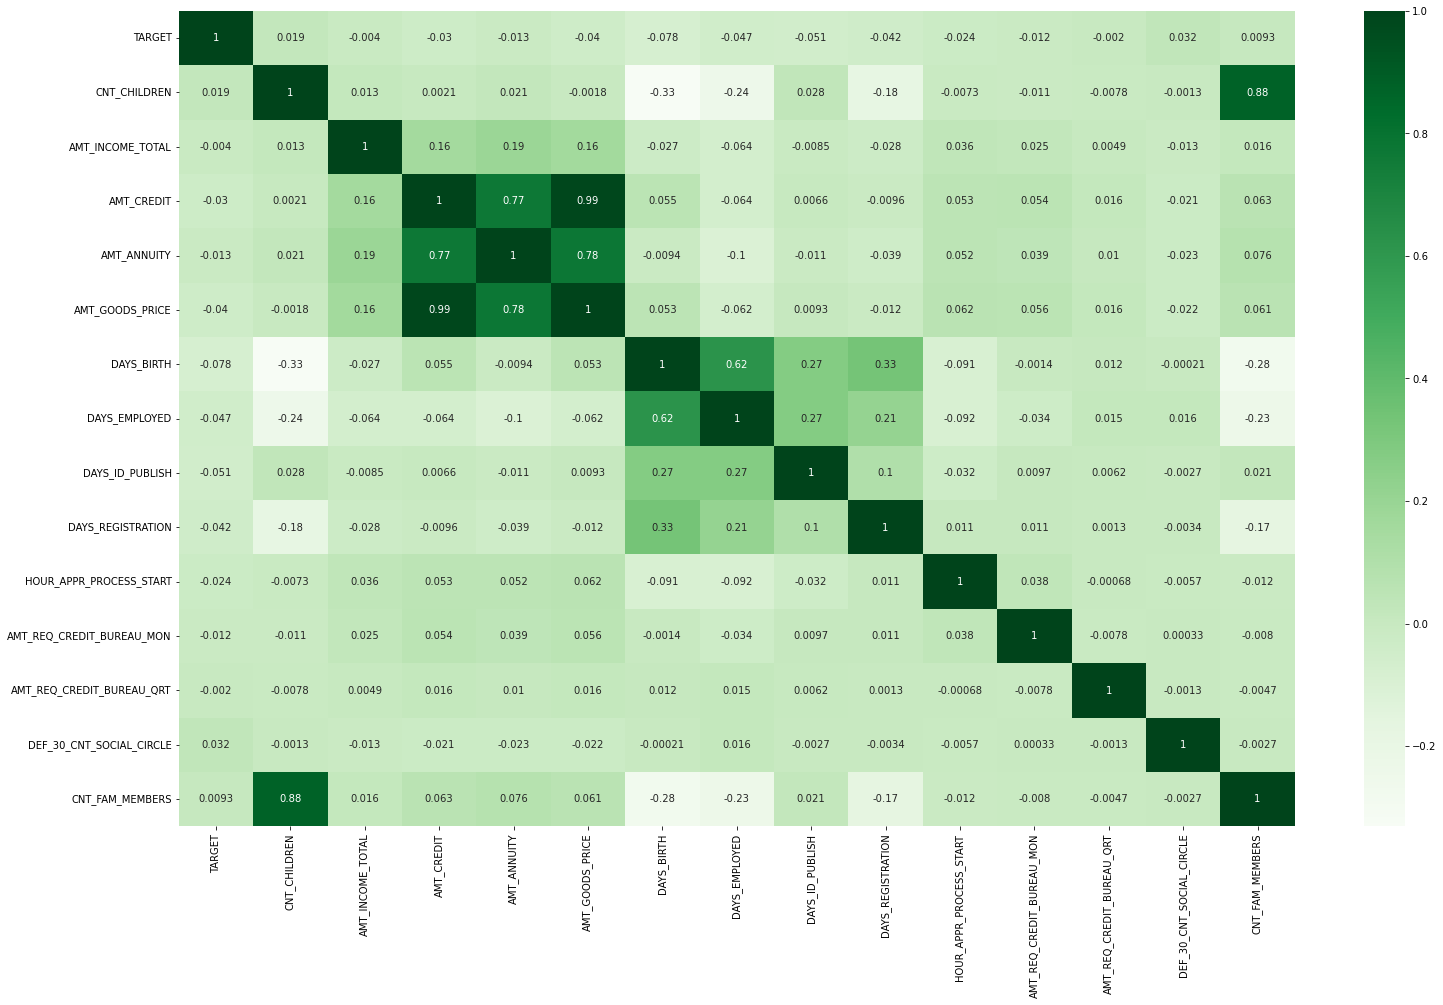

In [166]:
plt.figure(figsize = (25,15))
sns.heatmap(inp_corr,xticklabels=inp_corr.columns,yticklabels=inp_corr.columns,cmap='Greens',annot=True)

__comments__
-from the heatmap,client family members and client children are higly correlated so we can take anyone for other analysis,simlarly amount credit and 
amount goods pric,amount credit and amount annuity, and days_birth and cnl_children hsve high negative correlation.

In [167]:
#### Bivariate analysis for categorical variables
inp_catnew=[i for i in inp_imp if inp1[i].dtype=='O']
inp_catnew

['FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

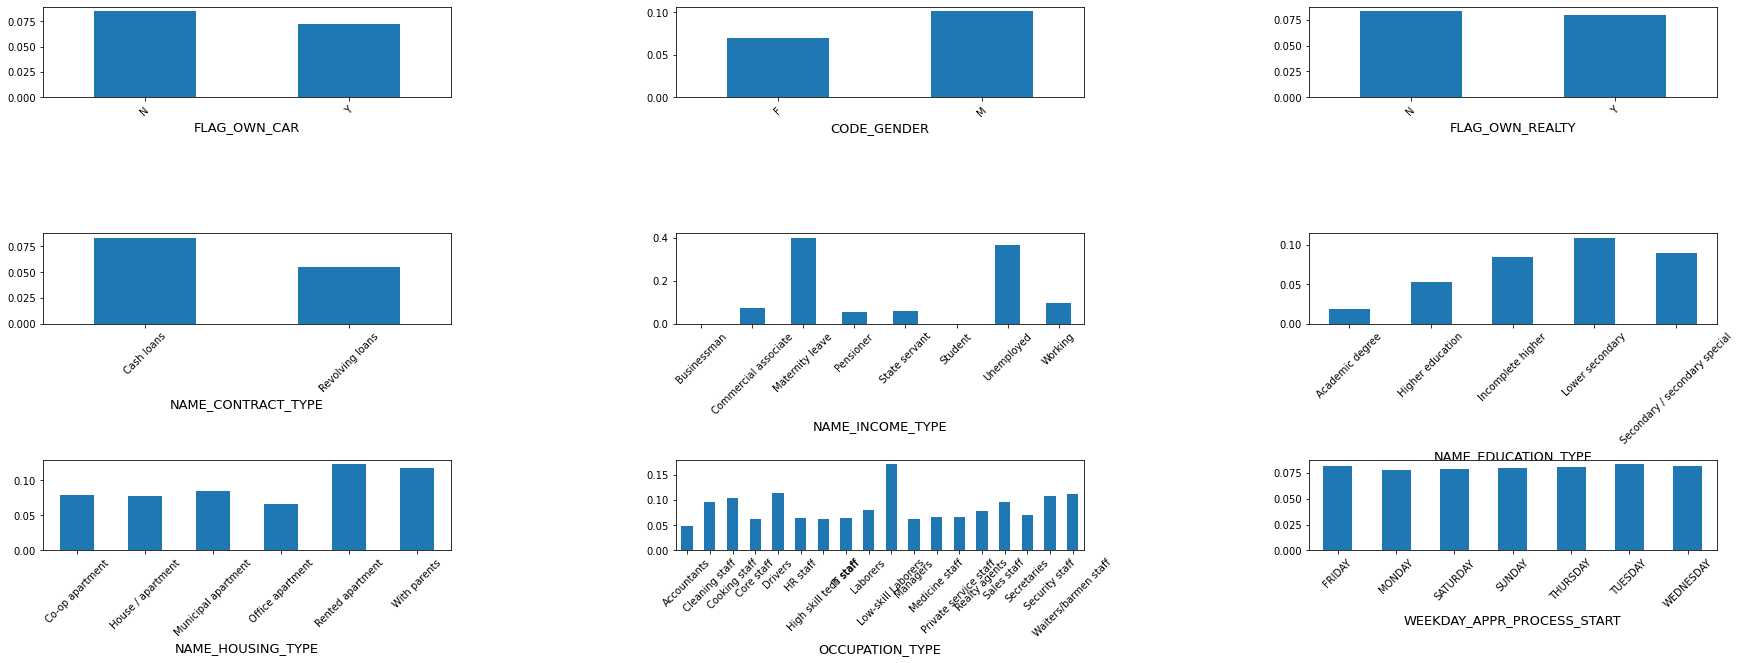

In [168]:

i=1
plt.figure(figsize=(30,10))
for col in inp_catnew: 
    plt.subplot(3,3,i)
    inp1.groupby([col])['TARGET'].mean().plot.bar()
    plt.xlabel(col,size=13)
    plt.xticks(rotation=45)
    i=i+1
plt.subplots_adjust(hspace=1.5,wspace=0.55) 
plt.show()

__from the above results we can tell that__

- who don't have a car are having high percentage of loan payment difficulties

- compared to female, male people are having high loan payment difficulties

- who don't have a house or flat are having high percentage of loan payment difficulties

- who are with cashloan contract type are having high percentage of loan payment difficulties

- commercial associates are  having high percentage of loan payment difficulties

- Lower secondary level people having high percentage of loan payment difficulties

- In housing type Rented type and  people living with parents are having high percentage of loan payment difficulties

- Laborers are having high percentage of loan payment difficulties


In [35]:
####segmented univariant analysis

In [43]:
####here we divide the original dataset into two datasets based on target values
target1=inp1.loc[inp1.TARGET==1]
target0=inp1.loc[inp1.TARGET==0]

In [222]:
numerics=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED']

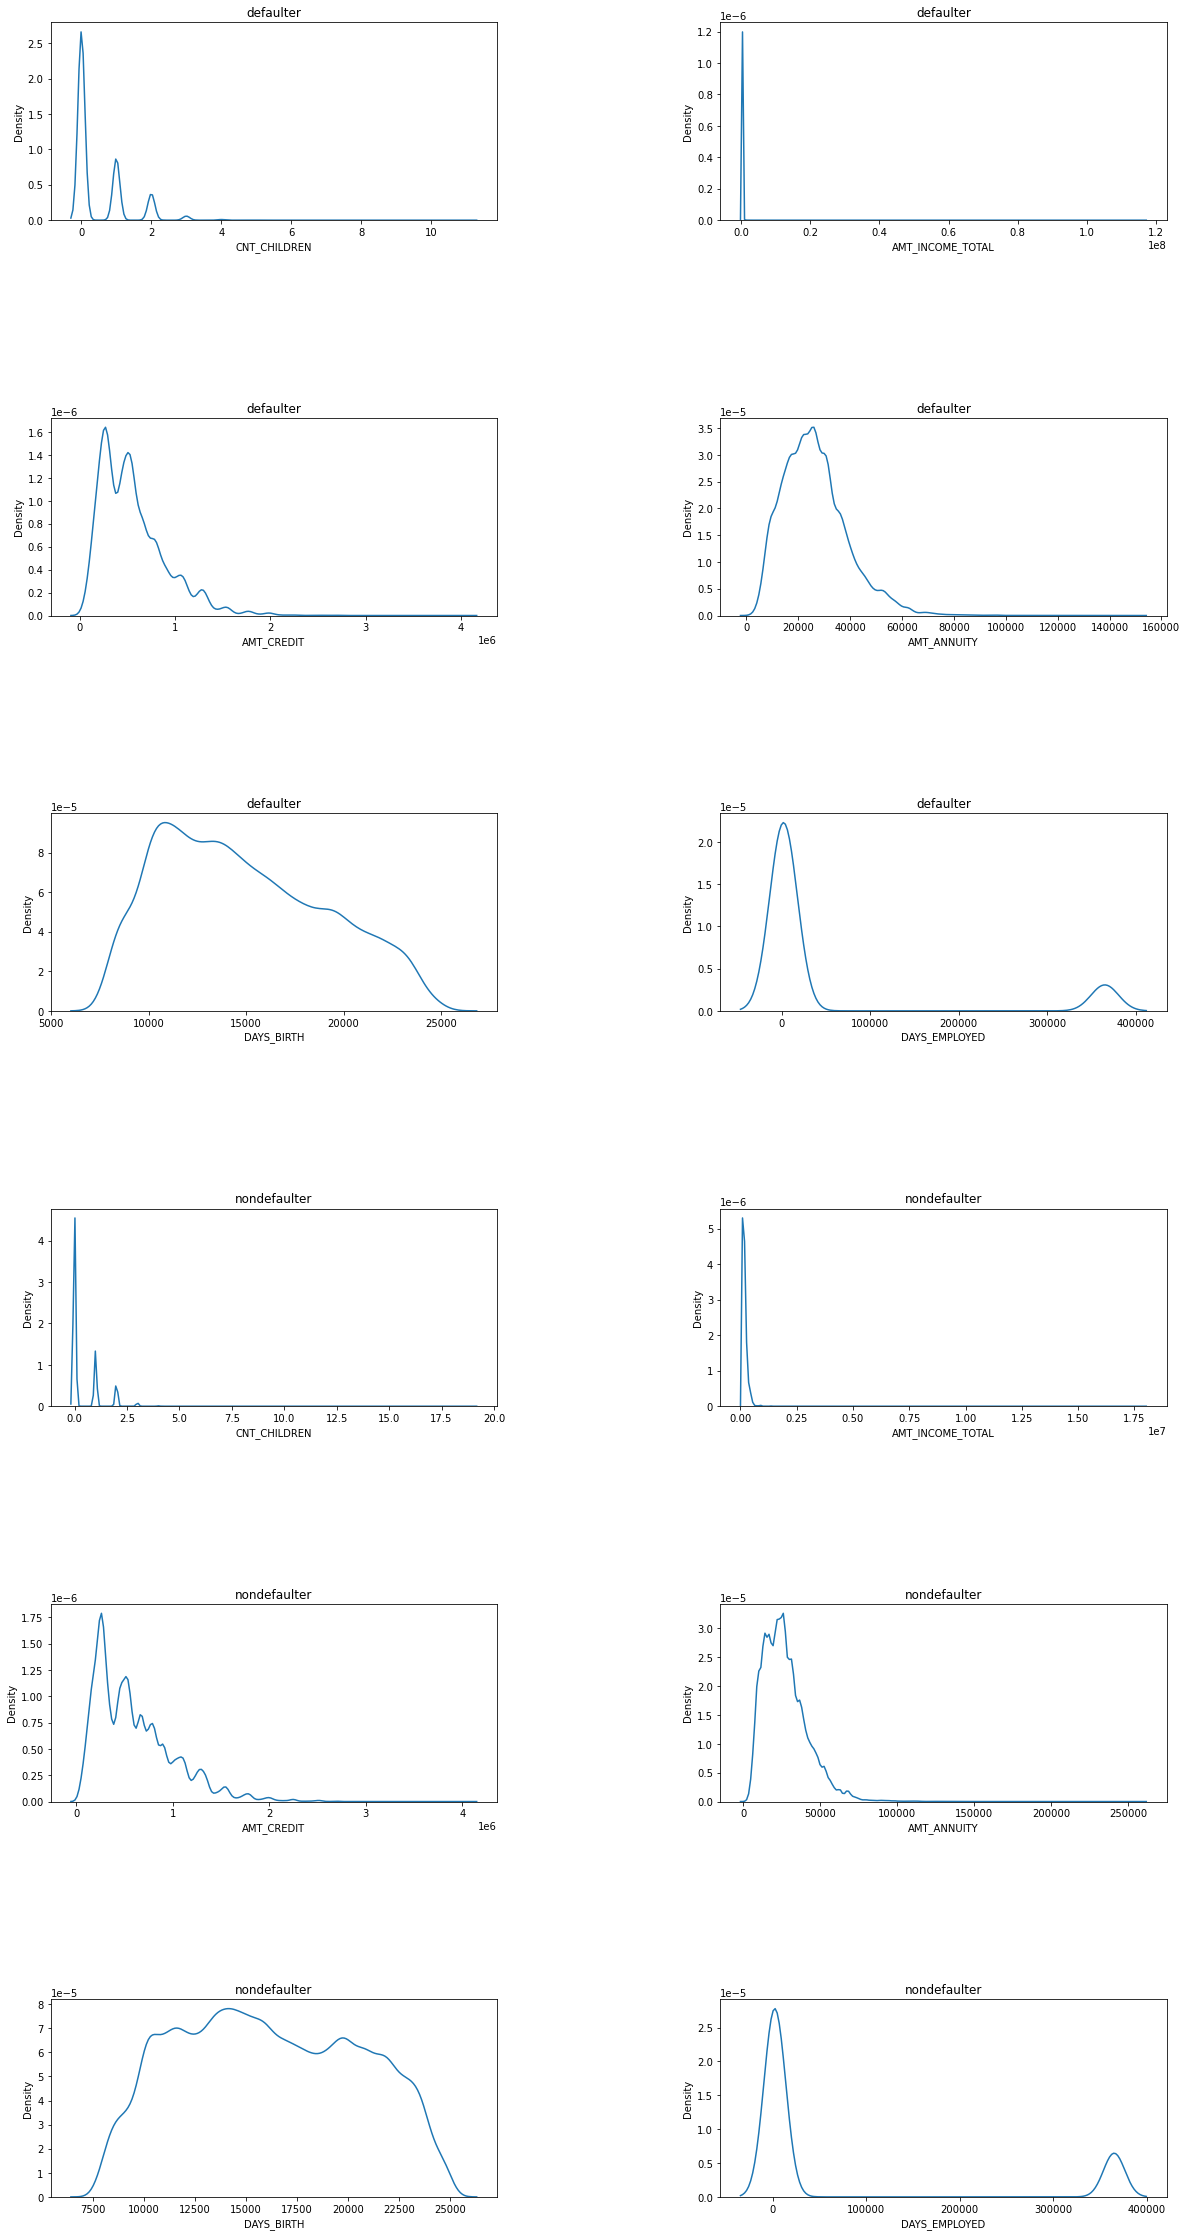

In [226]:
i=1
plt.figure(figsize=(20,40))
for col in numerics: 
    plt.subplot(6,2,i,title='defaulter')
    sns.kdeplot(target1[col])
    i=i+1  
j=7
for col in numerics: 
    plt.subplot(6,2,j,title='nondefaulter')
    sns.kdeplot(target0[col])
    j=j+1  
                
plt.subplots_adjust(hspace=1,wspace=0.5)     
plt.show()

_Comments_

from the density plots density of nondefaulter's CNT_CHILDREN,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_EMPLOYED are high compared to defaulters

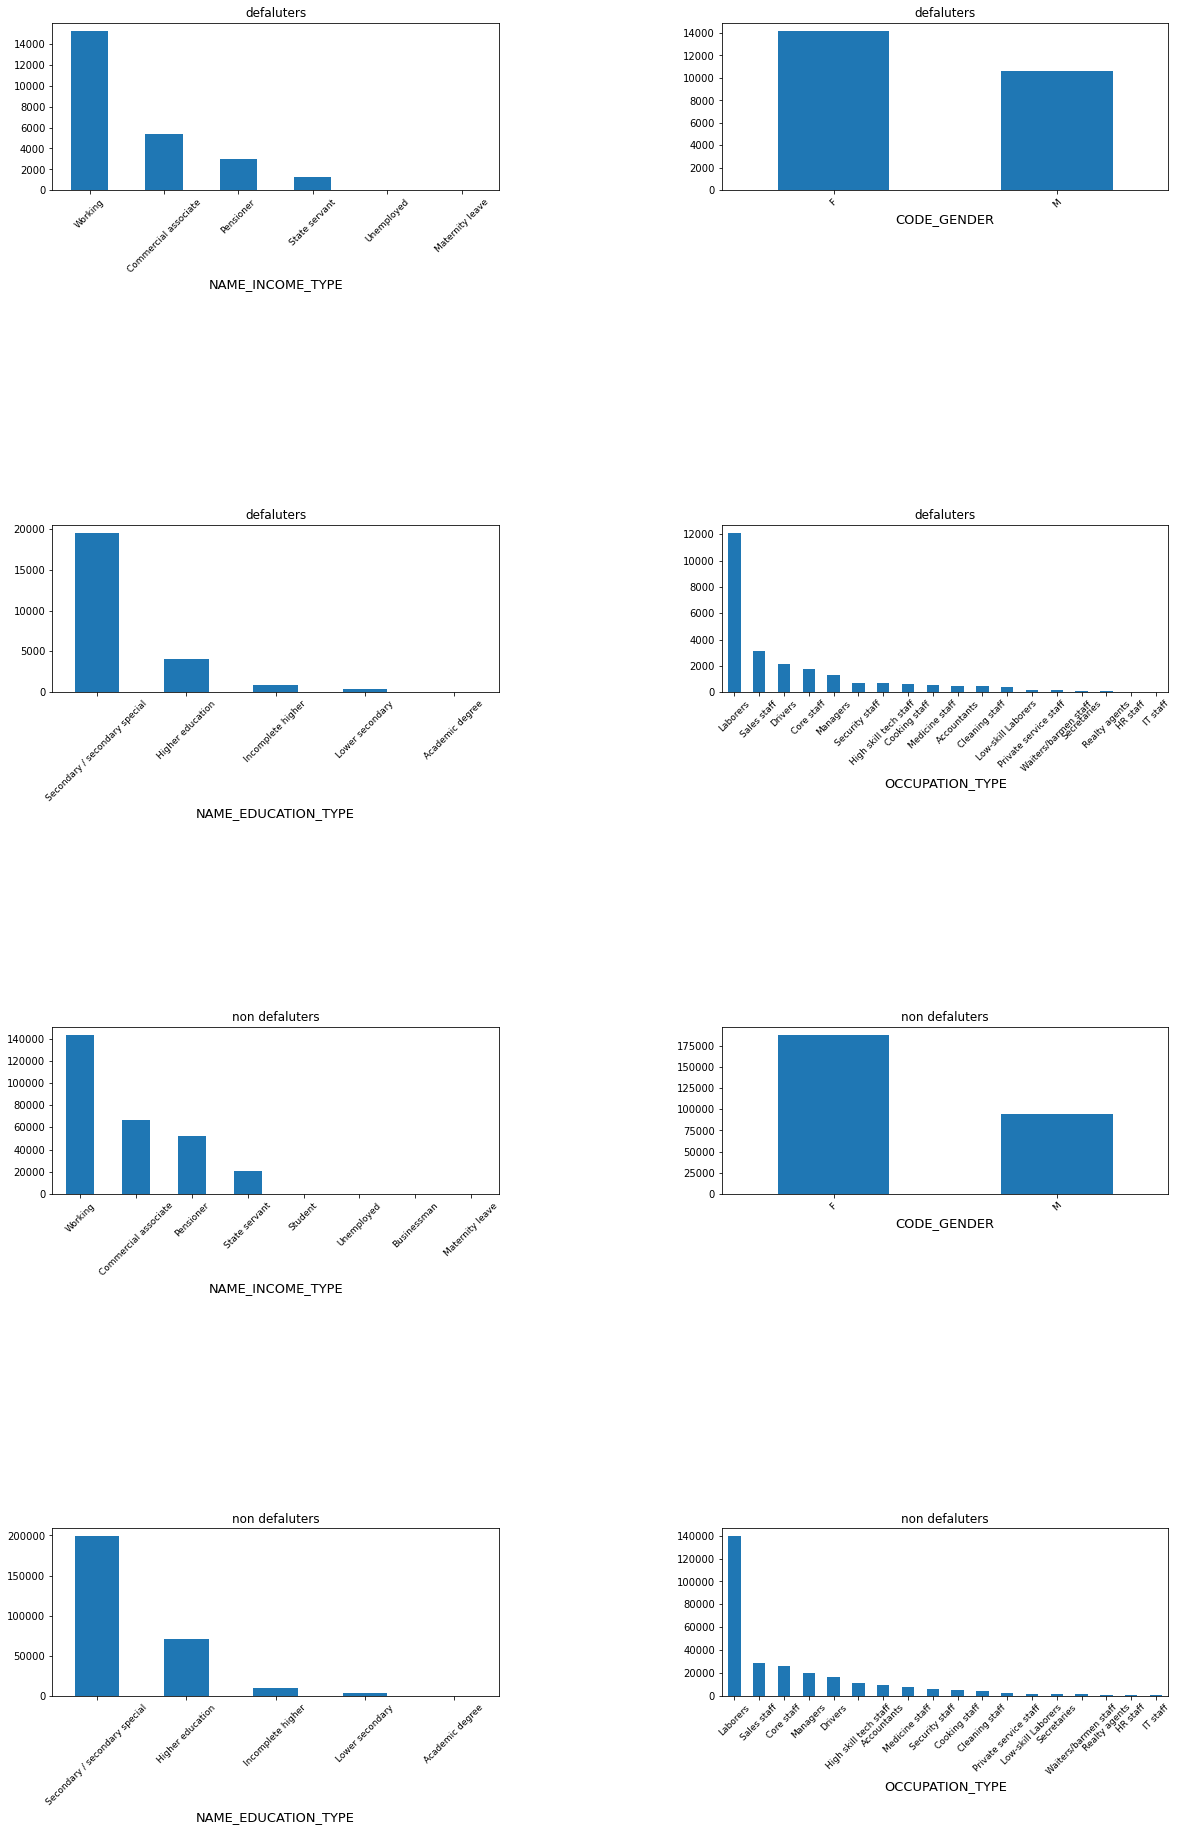

In [229]:
#### for this analysis i am taking set of some categorical variables
inp_set=['NAME_INCOME_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
#Bar plots for above set
i=1
plt.figure(figsize=(20,40))
for col in inp_set: 
    plt.subplot(5,2,i)
    target1[col].value_counts().plot(kind='bar')
    plt.xlabel(col,size=13)
    plt.xticks(rotation=45,size=9)
    plt.title('defaluters')
    i=i+1
j=5
for col in inp_set: 
    plt.subplot(5,2,j)
    target0[col].value_counts().plot(kind='bar')
    plt.xlabel(col,size=13)
    plt.title('non defaluters')
    plt.xticks(rotation=45,size=9)
    j=j+1
plt.subplots_adjust(hspace=2,wspace=0.5) 
plt.show()

_from the above results_

all variables are look similar in bar lots of  defaluter and non defaulters but quantity is diffrenet,for example working people in Name income type defaulters are just above 10000 but non defaulters are above 1lakh and similarly happened in other types of variables  

#### Previous application analysis

In [ ]:
#import previous application csv file

In [60]:
inp_prev = pd.read_csv('previous_application.csv')
inp_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#checking for null values
inp_prev.isnull().mean()

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [97]:
####replace XNA and XAP with NAN values
inp_prev.replace('XNA',np.nan,inplace=True)
inp_prev.replace('XAP',np.nan,inplace=True)

In [99]:
###finding the percentage of missing values greater than 35% and drop those columns
for i in inp_prev.columns:
    if inp_prev[i].isnull().mean()> 0.35:
        inp_prev.drop(i,axis=1,inplace=True)
        

In [100]:
inp_prev.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                346
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_CLIENT_TYPE                 1941
NAME_PORTFOLIO                 372230
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP               517215
PRODUCT_COMBINATION               346
dtype: int64

In [96]:
####Error values checking
#In privious Application Dataset days columns are given in negative

negcol_prev=[i for i in inp_prev if i.startswith('DAYS')]
negcol_prev

['DAYS_DECISION']

In [102]:
#replace the negative values with absolute values
inp_prev[negcol_prev]=abs(inp_prev[negcol_prev])
inp_prev[negcol_prev].describe()

,DAYS_DECISION
count,1.670214e+06
mean,8.806797e+02
std,7.790997e+02
min,1.000000e+00
25%,2.800000e+02
50%,5.810000e+02
75%,1.300000e+03
max,2.922000e+03


In [124]:
inp_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [105]:
####univariate analysis and identificaion of outliers
#finding numeric variables
inp_prev_nume=[i for i in inp_prev if inp_prev[i].dtype!='O']


In [106]:
print(len(inp_prev_nume))

11


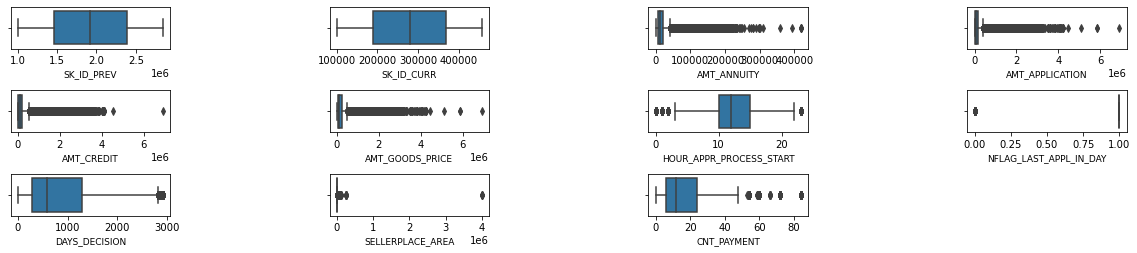

In [107]:
#Box plots for numerical variables
i=1
plt.figure(figsize=(20,10))
for col in inp_prev_nume: 
    plt.subplot(7,4,i)
    sns.boxplot(inp_prev[col])
    plt.xlabel(col,size=9)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

#From the above results all the variables contains outliers and amt_annuity ,amt_application,amt_credit,amt_goods_price has continuous outliers
and don't consider the plots of SK_ID_PREV,SK_ID_CURR because they are id's of clients

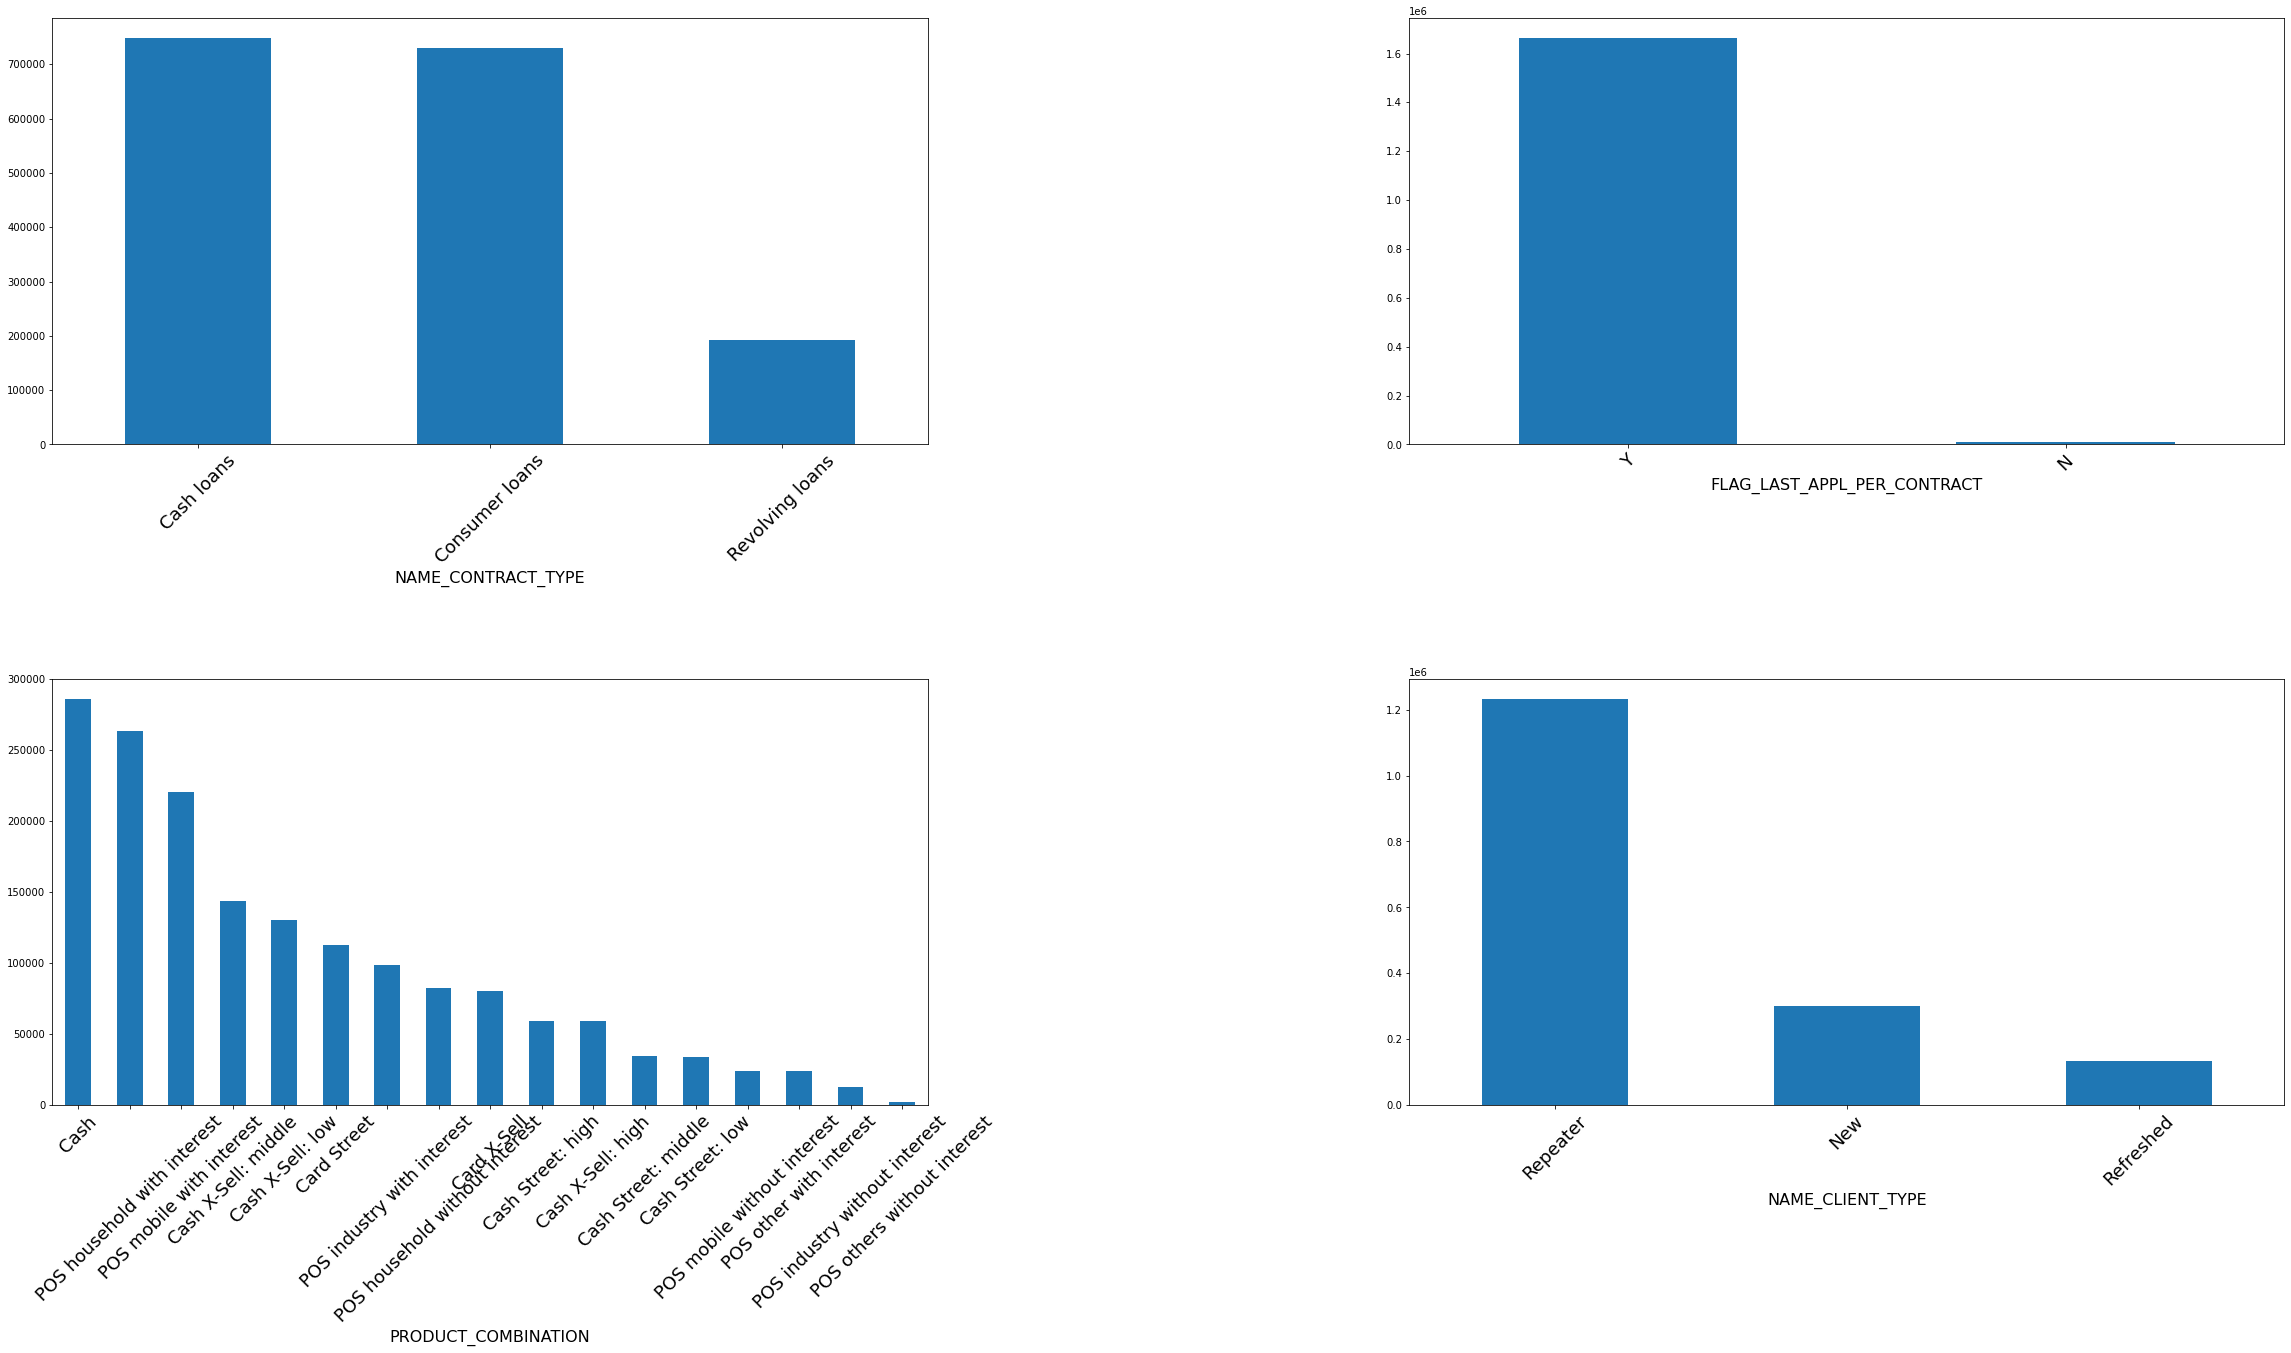

In [209]:
#univariate for some categorical variables
inp_prev_cat=['NAME_CONTRACT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','PRODUCT_COMBINATION','NAME_CLIENT_TYPE']
i=1
plt.figure(figsize=(40,20))
for col in inp_prev_cat: 
    plt.subplot(2,2,i)
    inp_prev[col].value_counts().plot(kind='bar')
    plt.xlabel(col,size=16)
    plt.xticks(rotation=45,size=18)
    i=i+1
plt.subplots_adjust(hspace=0.55,wspace=0.55) 
plt.show()

__comments__

_from the results in NAME_CONTRACT_TYPE cash and consumer loans are high,in FLAG_LAST_APPL_CONTRACT TYPE flag with y's are high
in PRODUCT _COMBINATION cash is high_ ,Repeaters are high client type


In [ ]:
####Bivariant analysis

In [ ]:
##consider some set variables

In [210]:
imp=['NAME_CONTRACT_TYPE','DAYS_DECISION','NAME_CLIENT_TYPE','PRODUCT_COMBINATION','CNT_PAYMENT','NAME_CONTRACT_STATUS','NFLAG_LAST_APPL_IN_DAY']

In [116]:
####find correlation and heatmap for numerical variables

imp_corr=inp_prev[imp].corr(method='pearson')
imp_corr

,DAYS_DECISION,CNT_PAYMENT,NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION,1.000000,-0.246453,-0.016555
CNT_PAYMENT,-0.246453,1.000000,0.063347
NFLAG_LAST_APPL_IN_DAY,-0.016555,0.063347,1.000000


<AxesSubplot:>

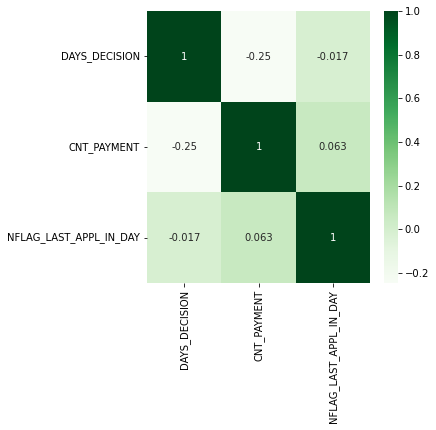

In [117]:
plt.figure(figsize = (5,5))
sns.heatmap(imp_corr,xticklabels=imp_corr.columns,yticklabels=imp_corr.columns,cmap='Greens',annot=True)

from the results DAYS_DECISION and CNT_PAYMENT are negativly correlated

In [211]:
#categorical variables
imp_cat=[i for i in imp if inp_prev[i].dtype=='O']
imp_cat

['NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_STATUS']

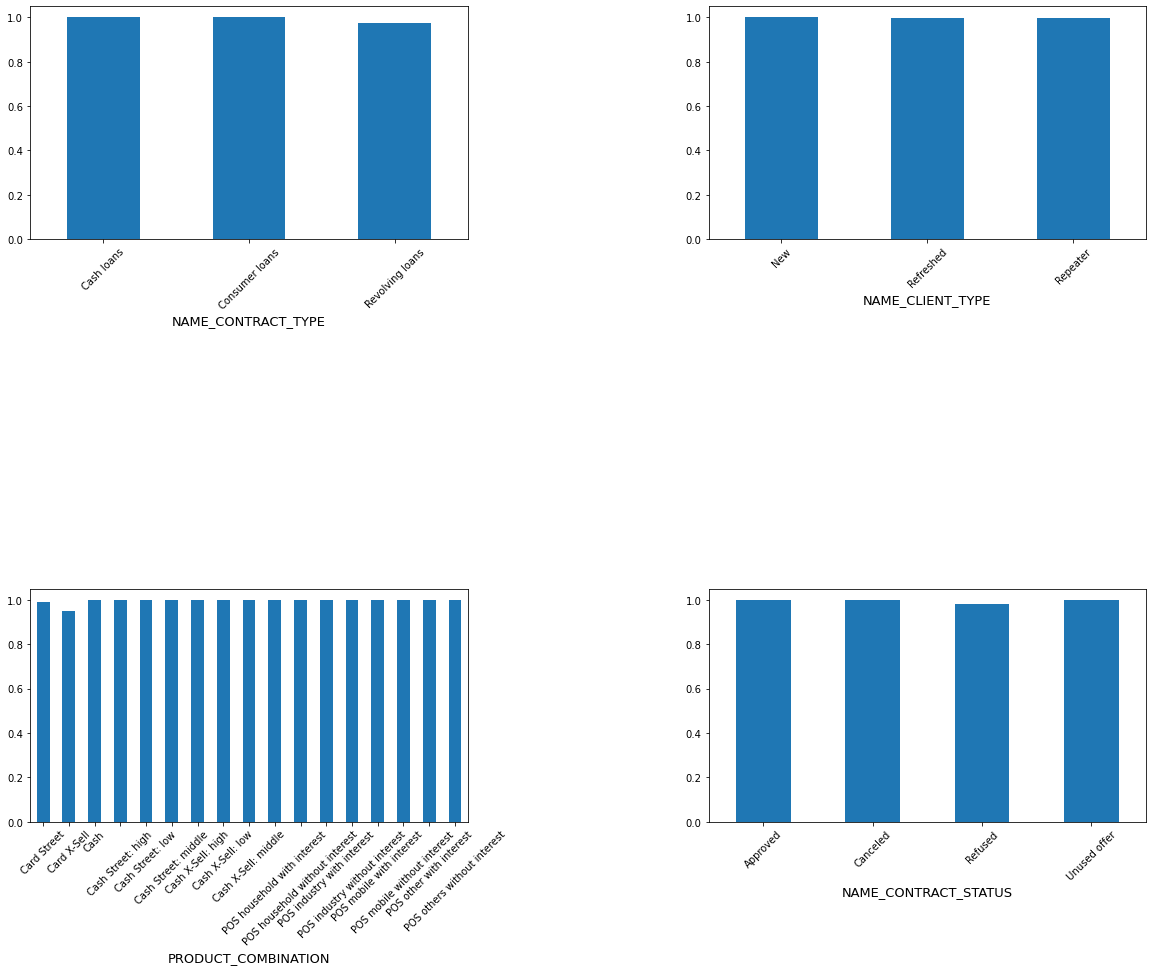

In [213]:
i=1
plt.figure(figsize=(20,15))
for col in imp_cat: 
    plt.subplot(2,2,i)
    inp_prev.groupby([col])['NFLAG_LAST_APPL_IN_DAY'].mean().plot.bar()
    plt.xlabel(col,size=13)
    plt.xticks(rotation=45)
    i=i+1
plt.subplots_adjust(hspace=1.5,wspace=0.55) 
plt.show()

from the results in each variable all have similarl relation with NFLAG_LAST_APPL_IN_DAY variable

#### merge the dataframes 

In [130]:
inp1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
inp_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,73,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,164,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,301,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,512,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,781,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high


from the above dataframes there are some common features present.In those SK_ID_CURR is a unique identifier which used for merging.

In [135]:
#here i am merging required columns in application dataset with previous application dataset
merg=pd.merge(inp1[['SK_ID_CURR','TARGET']],inp_prev, how='left',on=['SK_ID_CURR'])
merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  float64
 3   NAME_CONTRACT_TYPE           1413388 non-null  object 
 4   AMT_ANNUITY                  1106483 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  float64
 12  NAME_CONTRACT_STATUS         1413701 non-n

In [136]:
#univariant analysis 


In [145]:
#Numerical feartures in merged dataframe
merg_nume=[i for i in merg if merg[i].dtype=='float64']
merg_nume


['SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

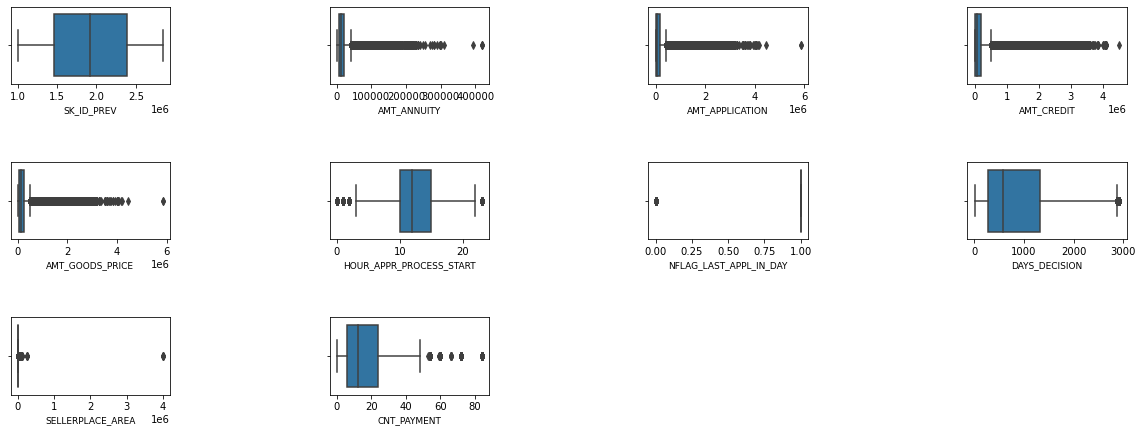

In [146]:
#Box plots for numerical features
i=1
plt.figure(figsize=(20,10))
for col in merg_nume: 
    plt.subplot(4,4,i)
    sns.boxplot(merg[col])
    plt.xlabel(col,size=9)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

__comments__

all are have outliers
here neglect the SK_ID_PREV because it is a id
AMT_ANNUITY ,AMT_APPLICATION ,AMT_CREDIT,AMT_GOODS_PRICE are having continuous outliers

In [ ]:
#univariate for some categorical variables
merg_cat=['NAME_CONTRACT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','PRODUCT_COMBINATION']
i=1
plt.figure(figsize=(20,10))
for col in merg_cat: 
    plt.subplot(2,2,i)
    merg[col].value_counts().plot(kind='bar')
    plt.xlabel(col,size=13)
    plt.xticks(rotation=45,size=11)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=0.55) 
plt.show()

__Comments__

from the results in NAME_CONTRACT_TYPE cash and consumer loans are high,in FLAG_LAST_APPL_CONTRACT TYPE flag with y's are high in PRODUCT _COMBINATION cash is high

In [ ]:
#Bivariate analysis

In [214]:
#take some set of variables
merg_imp=['NAME_CONTRACT_TYPE','DAYS_DECISION','PRODUCT_COMBINATION','CNT_PAYMENT','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','TARGET']

In [215]:
#generating heatmap for numerical variables
merg_imp_corr=merg[merg_imp].corr(method='pearson')
merg_imp_corr

,DAYS_DECISION,CNT_PAYMENT,TARGET
DAYS_DECISION,1.000000,-0.25346,-0.039901
CNT_PAYMENT,-0.253460,1.00000,0.030480
TARGET,-0.039901,0.03048,1.000000


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'DAYS_DECISION'),
  Text(1.5, 0, 'CNT_PAYMENT'),
  Text(2.5, 0, 'TARGET')])

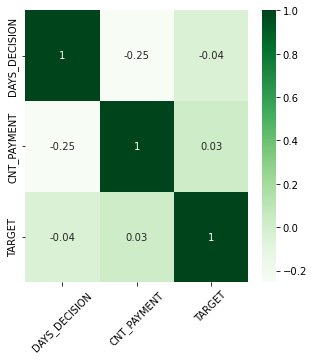

In [216]:
plt.figure(figsize = (5,5))
sns.heatmap(merg_imp_corr,xticklabels=merg_imp_corr.columns,yticklabels=merg_imp_corr.columns,cmap='Greens',annot=True)
plt.xticks(rotation=45)

__comments__

DAYS_DECISION has negitively correlated with TARGET variable where as CNT_PAYMENT is positively correlated with TARGET variable

In [217]:
#analysis for categorical variables

In [218]:
merg_cat=[i for i in merg_imp if merg[i].dtype=='O']
merg_cat

['NAME_CONTRACT_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_STATUS',
 'NAME_CLIENT_TYPE']

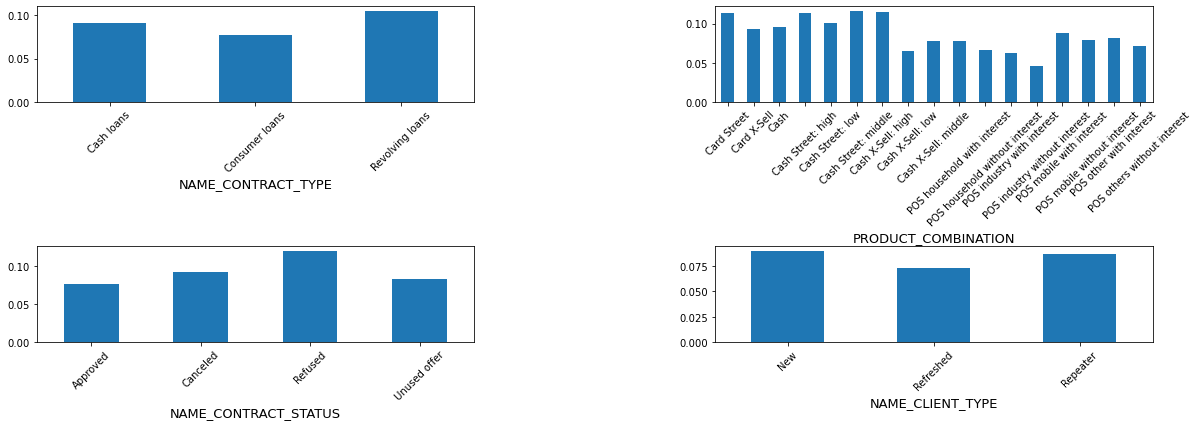

In [220]:
#Bar plots for variables
i=1
plt.figure(figsize=(20,15))
for col in merg_cat: 
    plt.subplot(4,2,i)
    merg.groupby([col])['TARGET'].mean().plot.bar()
    plt.xlabel(col,size=13)
    plt.xticks(rotation=45)
    i=i+1
plt.subplots_adjust(hspace=1.5,wspace=0.55) 
plt.show()

__comments__

- In NAME_CONTRACT_TYPE feature, Revolving loans have high target mean value

- In PRODUCT_COMBINATION feature,cash street(middle),cash X-sell(high) have high target mean value

- In NAME_CONTRACT_STATUS feature,Refused status have high target mean value

- Repeaters and New clients are having similar target mean value

here Target mean value means percentage of loan difficulties